In [18]:
import numpy as np
import math

# Why Do we need Loss Function ?

- To quantify how inacurate our model is
- Loss funcion's gradient also helps back propagating the mistakes to improve models's accuracy

# Different Common Loss Functions :

1. Regression Loss Functions
    - Mean Squared Error Loss
    - Mean Squared Logarithmic Error Loss
    - Mean Absolute Error Loss
    - Huber Loss
2. Binary Classification Loss Functions
    - Binary Cross-Entropy (Catagorical Cross Entropy binary)
    - Hinge Loss
    - Squared Hinge Loss
3. Multi-Class Classification Loss Functions
    - Multi-Class Cross-Entropy Loss (Catagorical Cross Entropy multiclass)
    - Sparse Catagorical Cross Entropy Loss
    - Kullback Leibler Divergence Loss

# Regression Loss Function

# Mean Squared Error (L2 Loss) 

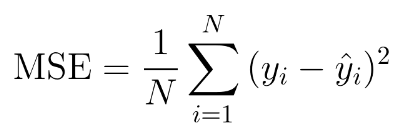

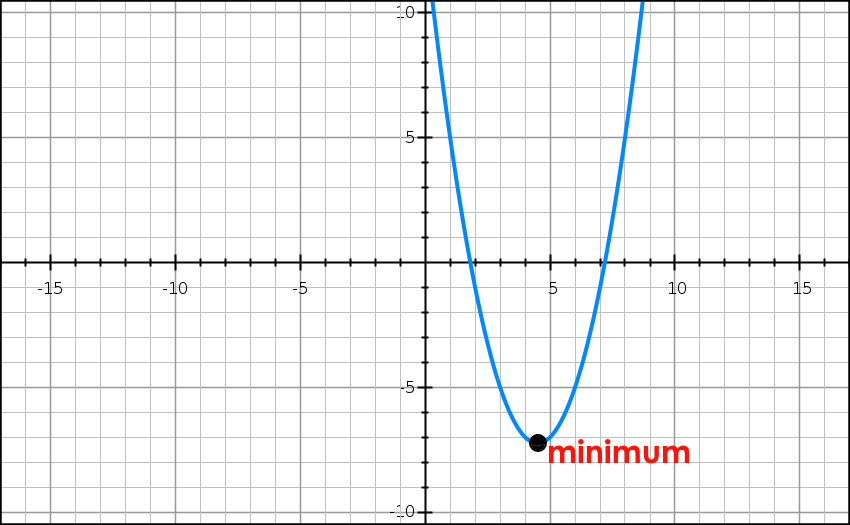
- Advantage
    - MSE is quadratic, means it will always have a global minimum
    - Since there are no local minima, we will never get stuck in one.
    - Hence, it is always guaranteed that Gradient Descent will converge (if it converges at all) to the global minimum

- Disadvantage
    - MSE penalizes the model for making large errors by squaring them
    - If our data has a large set of outliers, MSE is not the best fit for such dataset
    - Because the outliers will skew the model towards them even more because of high penalty

In [9]:
# MSE :

def MSE(y_original,y_predicted):
    return np.mean((y_original - y_predicted)**2)

y_original = np.array([85,56,65,48])
y_predicted = np.array([100,85,92,20])

MSE(y_original,y_predicted)

644.75

- Since MSE has big penalties, it is better to use a SMALLER learning rate for smooth reduction in loss
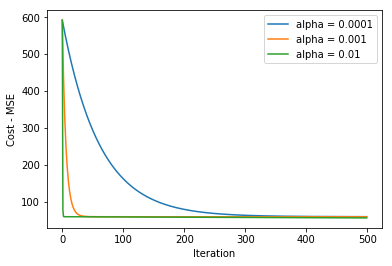

# Mean Absolute Error (L1 Loss)

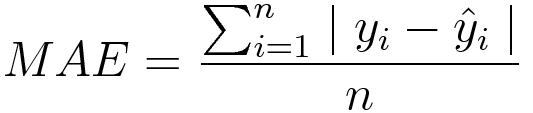

- Advantage
    - It is more robust at handeling dataset with large number of outliers than MSE

- Disadvantage
    - It is not quadratic
    - So it doesnt has the advantages of MSE having a single Global minima and easy to find

In [10]:
# MAE :

def MAE(y_original,y_predicted):
    return np.mean(np.abs(y_original - y_predicted))

y_original = np.array([85,56,65,48])
y_predicted = np.array([100,85,92,20])

MAE(y_original,y_predicted)

24.75

- Since MAE has smaller penalties, it is better to use a middle ranged learning rate for smooth reduction in loss
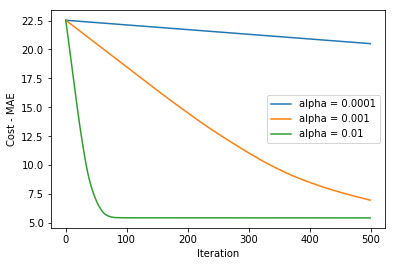

# Huber Loss

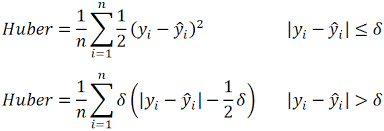

- It combines the best parts of MSE and MAE
- If the loss is huge (probably because of Outlier) it uses a linear function
- And if loss is less it uses a quadratic function

- delta (δ) here is the threshold of MAE Loss

In [15]:
# Huber Loss :

def Huber(y_original,y_predicted,delta):
    abs_loss = np.abs(y_original - y_predicted)
    loss = []
    
    for i in abs_loss:
        if i > delta:
            loss.append((i - delta/2)*delta)
        else:
            loss.append(i**2)

    return np.mean(loss)

y_original = np.array([85,56,65,48])
y_predicted = np.array([100,85,92,20])

Huber(y_original,y_predicted,16)

296.25

# Mean Squared Logarithmic Error Loss ( MSLE )

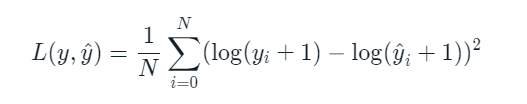

- MSLE can be interpreted as a measure of the ratio between the true and predicted values
- Because : 
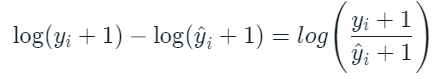

- MSLE only care about the relative difference between the true and the predicted value
- In other words MSLE only care about the percentual difference
- This means that MSLE will treat small differences approximately the same as big differences

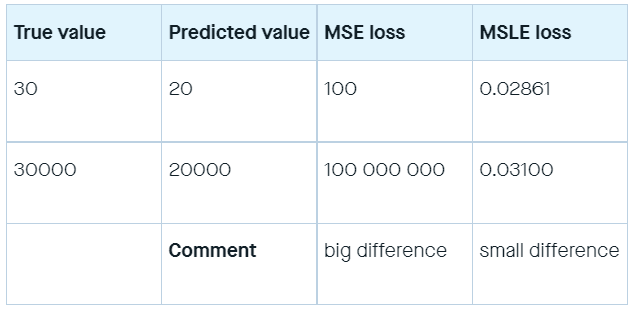

- MSLE penalizes underestimates more than overestimates
- For same reason it introduces assymetry in error curve

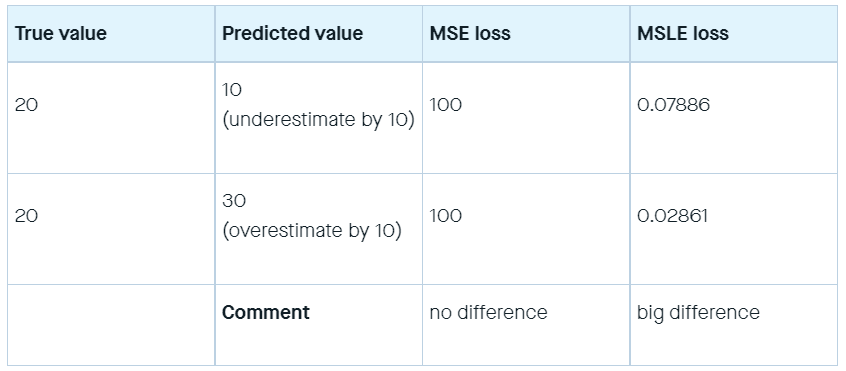

In [22]:
# MSLE Loss :

def MSLE(y_original,y_predicted):
    return np.mean((np.log(y_original) - np.log(y_predicted))**2)

y_original = np.array([85,56,65,48])
y_predicted = np.array([100,85,92,20])

MSLE(y_original,y_predicted)

0.27192112708011995

- MSLE is used where target is normally distributed
- And we don’t want large errors to be significantly more penalized than small ones
- In those cases where the range of the target value is large

# Binary Classification Loss Functions

# Log Loss / Binary Cross Entropy

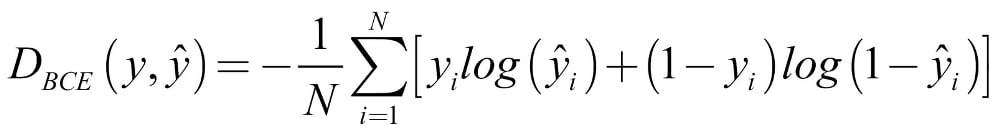

- It is a binary classification and has two values for y_original (classes) = 0,1
- Since it is a binary classification , the activation function in output layer must be sigmoid
- Sigmoid provides the output as probability of that datapoint belonging to class 1
- If probability > 0.5 : then it belogs to class 1, or else it belongs to class 0
- So, from above discussion it is clear that y_predicted is a probability of the datapoint belonging to class 1

- So above log loss function is -Mean of :
    - y_original x log(y_predicted) + (1 - y_original) x log(1 - y_predicted)
- if 
    - y_original = 0, then expression becomes : log(1 - y_predicted)
    - y_original = 1, then expression becomes : log(y_predicted)
- So it is always :  -Mean( log( probability_of_datapoint_belongs_to_class_1 ) )

In [4]:
# BCE :

# Since it contains log( ) function, it cannot have 0 inside it
# From the formula, y_predicted can never be 0 or 1
# So we need to adjust y_predicted in such a manner that :
# the 0 values are slightly greater than 0 
# and 1 values are slightly lesser than 1 

def BCE(y_original,y_predicted):
    
    alpha = 1e-15 # (0.000...(14 zeros)......001)
    y_predicted_new = np.array([alpha if i==0 else i-alpha for i in y_predicted])
    
    return -np.mean(y_original * np.log(y_predicted_new) + (1-y_original) * np.log(1-y_predicted_new))
    
y_original = np.array([0.85,0.56,0.65,0.48])
y_predicted = np.array([1,1,1,0])

BCE(y_original,y_predicted)

12.261453525589388

# Hinge Loss

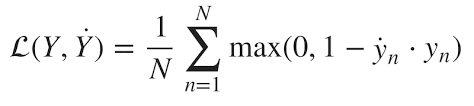

- Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers
- It works with class labels -1 and 1
- Make Sure to change the classification class from 0 to -1 for Hinge loss
- Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident
- Use in combination with the tanh() activation function in the last layer (as tanh() operates with 1,-1 as output)

In [38]:
# Hinge Loss :

def Hinge(y_original,y_predicted):
    return np.mean(np.array([max(0,1-i) for i in y_original*y_predicted]))
    
y_original = np.array([0.85,0.56,0.65,-0.52])
y_predicted = np.array([1,1,1,-1])

Hinge(y_original,y_predicted)

0.355

# Squared Hinge Loss

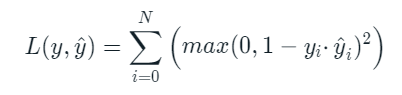

- We use Squared Hinge Loss when we are not interested in knowing how certain the classifier is about the classification
- Use in combination with the tanh() activation function in the last layer (as tanh() operates with 1,-1 as output)

In [39]:
# Squared Hinge Loss :

def Squared_Hinge(y_original,y_predicted):
    return np.mean(np.array([max(0,1-i)**2 for i in y_original*y_predicted]))
    
y_original = np.array([0.85,0.56,0.65,-0.52])
y_predicted = np.array([1,1,1,-1])

Squared_Hinge(y_original,y_predicted)

0.14225

# Multiclass Classification Loss Functions

# Multi-Class Cross Entropy Loss

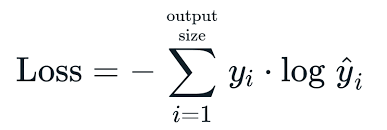

- The multi-class cross-entropy loss is a generalization of the Binary Cross Entropy loss
- Since it is multiclass, Softmax function is used at output layer

# Sparse Catagorical Cross Entropy

- Both, categorical cross entropy and sparse categorical cross entropy have the same loss function
- The only difference is the format in which y_original is labled

- If y_original is one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

- If y_original is integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]


- One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.